In [1]:
# To support both python 2 and python 3
# 让这份笔记同步支持 python 2 和 python 3
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
#使用statsmodels便于统计分析数据
import statsmodels.api as sm
import statsmodels.formula.api as smf
#使用sklearn便于预测（机器学习）
from sklearn import linear_model
#使用patsy便于生成模型
import patsy

# 10.1 The Challenge of Unsupervised Learning

# 10.2 Principal Components Analysis

**10.2.1 What Are Principal Components?**

In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
USArrests = pd.read_csv('Data/USArrests.csv', na_values='?').dropna()
std_scaler = StandardScaler(with_mean = False) #PCA自带with_mean功能
std_scaler.fit(USArrests.iloc[:,1:])
X_Standard = std_scaler.transform(USArrests.iloc[:,1:])
pca = PCA()
pca.fit(X_Standard)
vectors_pca = pd.DataFrame(pca.components_.T,columns = ['PC1','PC2','PC3','PC4'],index = USArrests.columns[1:]).round(3)
USArrests_pca = pd.DataFrame(pca.transform(X_Standard),columns = ['PC1','PC2','PC3','PC4'],index = USArrests.State)

**FIGURE 10.1.**

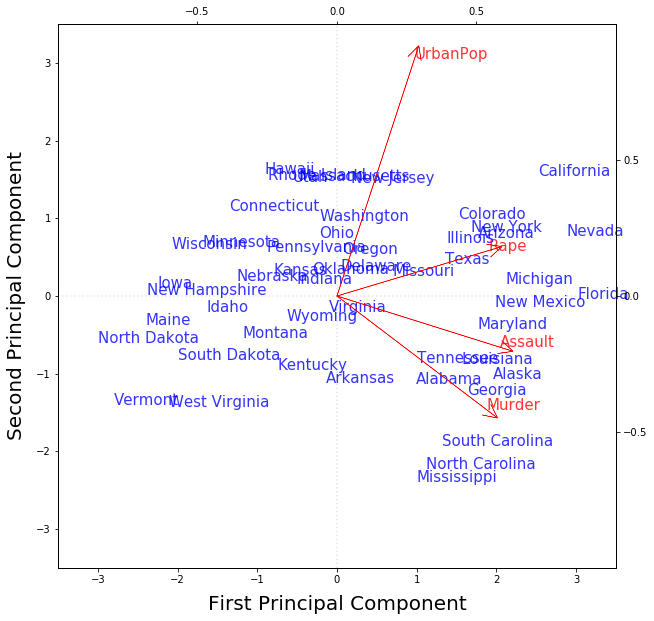

In [4]:
plt.figure(figsize=(10, 10))
host = plt.subplot(111)
host.set_xlim(-3.5,3.5)
host.set_ylim(-3.5,3.5)
host.set_xlabel('First Principal Component',fontsize=20,labelpad=10)
host.set_ylabel('Second Principal Component',fontsize=20,labelpad=10)
host.axhline(0,linestyle=':',alpha = 0.1,color = 'k')
host.axvline(0,linestyle=':',alpha = 0.1,color = 'k')
for state in USArrests.State:
    #如果需要有指向性箭头使用plt.annotate
    #plt.annotate(state,(USArrests_pca['PC1'][state], USArrests_pca['PC2'][state]),alpha = 0.8,color = 'blue')
    host.text(USArrests_pca['PC1'][state],-USArrests_pca['PC2'][state],state,alpha = 0.8,color = 'blue', fontsize=15)
par = host.twinx().twiny()
par.set_xlim(-1,1)
par.set_ylim(-1,1)
par.set_xticks([-0.5,0,0.5])
par.set_yticks([-0.5,0,0.5])
for variable in vectors_pca.index:
    par.text(vectors_pca['PC1'][variable],-vectors_pca['PC2'][variable],variable,alpha = 0.8,color = 'red', fontsize=15)
    par.arrow(0, 0, vectors_pca['PC1'][variable], -vectors_pca['PC2'][variable], color='red',
              linewidth = 0.5,head_width=0.05,head_length=0.05,overhang = 1)
plt.show()

**10.2.2 Another Interpretation of Principal Components**

**10.2.3 More on PCA**

**FIGURE 10.3.**

In [5]:
X = USArrests.iloc[:,1:]
pca_unscaled = PCA()
pca_unscaled.fit(X)
vectors_pca_unscaled = pd.DataFrame(pca_unscaled.components_.T,columns = ['PC1','PC2','PC3','PC4'],index = USArrests.columns[1:]).round(3)
USArrests_pca_unscaled = pd.DataFrame(pca_unscaled.transform(X),columns = ['PC1','PC2','PC3','PC4'],index = USArrests.State)

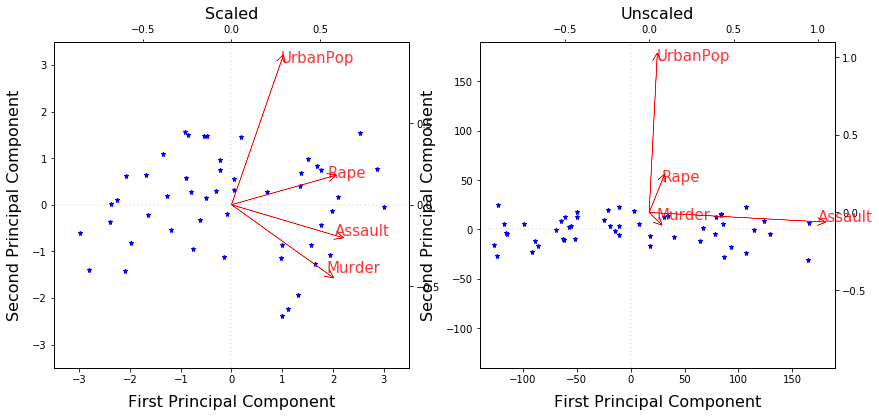

In [6]:
plt.figure(figsize=(14, 6))
host = plt.subplot(121)
host.set_xlim(-3.5,3.5)
host.set_ylim(-3.5,3.5)
host.set_xlabel('First Principal Component',fontsize=16,labelpad=10)
host.set_ylabel('Second Principal Component',fontsize=16,labelpad=10)
host.axhline(0,linestyle=':',alpha = 0.1,color = 'k')
host.axvline(0,linestyle=':',alpha = 0.1,color = 'k')
for state in USArrests.State:
    host.plot(USArrests_pca['PC1'][state],-USArrests_pca['PC2'][state],'b*',markersize = 5)
par = host.twinx().twiny()
par.set_xlim(-1,1)
par.set_ylim(-1,1)
par.set_xticks([-0.5,0,0.5])
par.set_yticks([-0.5,0,0.5])
par.set_title('Scaled',fontsize=16)
for variable in vectors_pca.index:
    par.text(vectors_pca['PC1'][variable],-vectors_pca['PC2'][variable],variable,alpha = 0.8,color = 'red', fontsize=15)
    par.arrow(0, 0, vectors_pca['PC1'][variable], -vectors_pca['PC2'][variable], color='red',
              linewidth = 0.5,head_width=0.05,head_length=0.05,overhang = 1)
host = plt.subplot(122)
host.set_xlim(-140,190)
host.set_ylim(-140,190)
host.set_xlabel('First Principal Component',fontsize=16,labelpad=10)
host.set_ylabel('Second Principal Component',fontsize=16,labelpad=10)
host.axhline(0,linestyle=':',alpha = 0.1,color = 'k')
host.axvline(0,linestyle=':',alpha = 0.1,color = 'k')
for state in USArrests.State:
    host.plot(USArrests_pca_unscaled['PC1'][state],-USArrests_pca_unscaled['PC2'][state],'b*',markersize = 5)
par = host.twinx().twiny()
par.set_xlim(-1,1.1)
par.set_ylim(-1,1.1)
par.set_xticks([-0.5,0,0.5,1])
par.set_yticks([-0.5,0,0.5,1])
par.set_title('Unscaled',fontsize=16)
for variable in vectors_pca.index:
    par.text(vectors_pca_unscaled['PC1'][variable],-vectors_pca_unscaled['PC2'][variable],variable,alpha = 0.8,color = 'red', fontsize=15)    
    par.arrow(0, 0, vectors_pca_unscaled['PC1'][variable], -vectors_pca_unscaled['PC2'][variable], color='red',
              linewidth = 0.5,head_width=0.05,head_length=0.05,overhang = 1)
plt.show()

**FIGURE 10.4.**

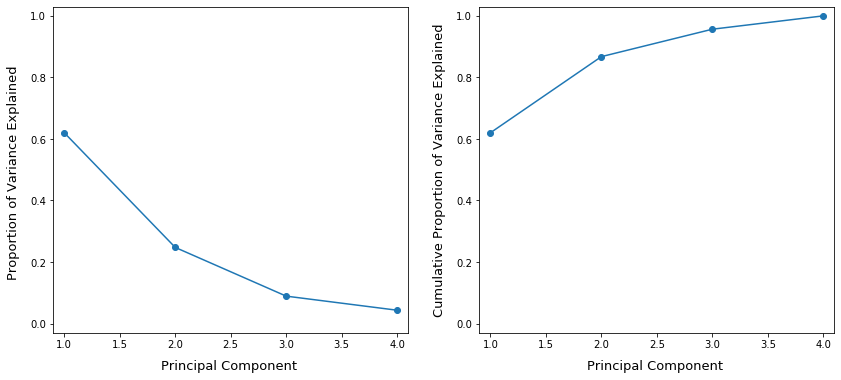

In [7]:
plt.figure(figsize=(14, 6))
plt.subplot(121)
plt.plot([1,2,3,4],pca.explained_variance_ratio_,'o-')
plt.xlim(0.9,4.1)
plt.ylim(-0.03,1.03)
plt.yticks(np.linspace(0,1,6))
plt.xlabel("Principal Component " ,fontsize=13,labelpad=10)
plt.ylabel("Proportion of Variance Explained " ,fontsize=13,labelpad=10)
plt.subplot(122)
plt.plot([1,2,3,4],pca.explained_variance_ratio_.cumsum(),'o-')
plt.xlim(0.9,4.1)
plt.ylim(-0.03,1.03)
plt.yticks(np.linspace(0,1,6))
plt.xlabel("Principal Component " ,fontsize=13,labelpad=10)
plt.ylabel("Cumulative Proportion of Variance Explained" ,fontsize=13,labelpad=10)
plt.show()

**10.2.4 Other Uses for Principal Components**

# 10.3 Clustering Methods

**10.3.1 K-Means Clustering**

**FIGURE 10.5.**

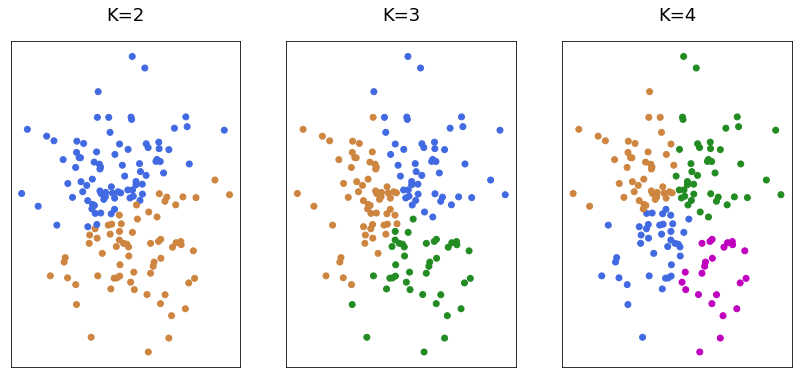

In [8]:
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap
color_list = ['peru','m','forestgreen','royalblue','red','brown','peru']
cmap = ListedColormap(color_list[:4])
np.random.seed(2012)
X = np.random.normal(0,1,(150,2)) 
plt.figure(figsize=(14, 6))
for i in range(1,4):
    plt.subplot(1,3,i)
    km_out = KMeans(n_clusters=i + 1, n_init=20)
    km_out.fit(X)
    plt.scatter(X[:,0],X[:,1],c = km_out.labels_,cmap=cmap)
    plt.title('K={}'.format(i + 1) ,fontsize=18, pad = 20)
    plt.xticks([])
    plt.yticks([])
plt.show()

**FIGURE 10.6.**

In [9]:
#定义step a/step b函数
def no_tick():
    plt.xticks([])
    plt.yticks([])
def iteration_a(title = 'step a'):
    z = np.c_[np.average(X[y==0],axis = 0),
                np.average(X[y==1],axis = 0),
                np.average(X[y==2],axis = 0)]
    plt.scatter(X[:,0],X[:,1],c = y,cmap=cmap)
    plt.scatter(z[0],z[1],s = 200,edgecolors = 'k',cmap=cmap,c = [0,1,2])
    no_tick()
    plt.title(title,fontsize=16, pad = 10)
    return z
def iteration_b(title = 'step a'):
    iteration_pd = pd.DataFrame({0:np.square(X-z[:,0]).sum(axis = 1),
                                1:np.square(X-z[:,1]).sum(axis = 1),
                                2:np.square(X-z[:,2]).sum(axis = 1)})
    y = iteration_pd.idxmin(axis = 1).values
    plt.scatter(X[:,0],X[:,1],c = y,cmap=cmap)
    plt.scatter(z[0],z[1],s = 200,edgecolors = 'k',cmap=cmap,c = [0,1,2])
    no_tick()
    plt.title(title,fontsize=16, pad = 10)
    return y

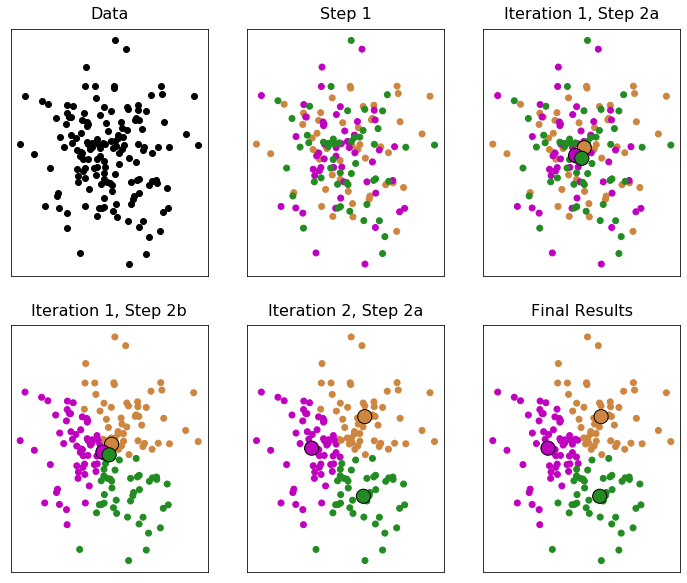

In [10]:
plt.figure(figsize=(12, 10))
plt.subplot(2,3,1)
plt.scatter(X[:,0],X[:,1],c = 'k')
no_tick()
plt.title('Data' ,fontsize=16, pad = 10)
plt.subplot(2,3,2)
color_list = ['peru','m','forestgreen']
cmap = ListedColormap(color_list)
y = np.repeat([0,1,2],50)
plt.scatter(X[:,0],X[:,1],c = y,cmap=cmap)
plt.title('Step 1' ,fontsize=16, pad = 10)
no_tick()
plt.subplot(2,3,3)
z = iteration_a('Iteration 1, Step 2a')
plt.subplot(2,3,4)
y = iteration_b('Iteration 1, Step 2b')
plt.subplot(2,3,5)
z = iteration_a('Iteration 2, Step 2a')
plt.subplot(2,3,6)
y = iteration_b('Final Results')
plt.show()

**FIGURE 10.7.**

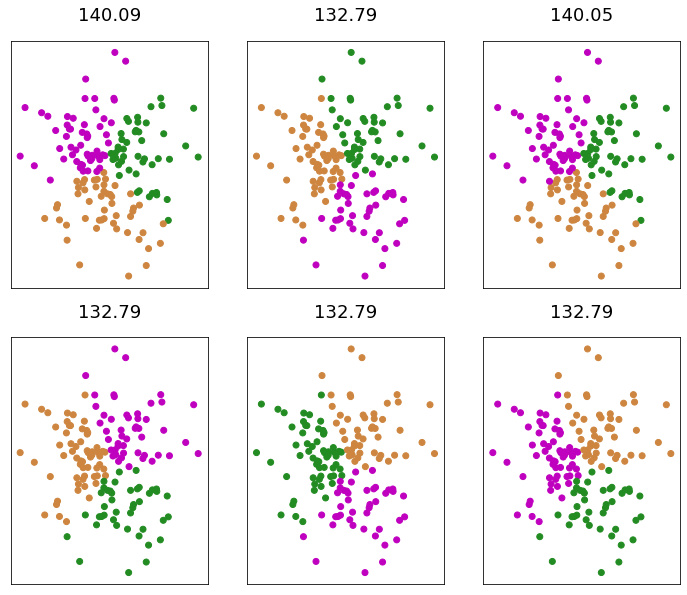

In [11]:
plt.figure(figsize=(12, 10))
for i in range(1,7):
    plt.subplot(2,3,i)
    km_out = KMeans(n_clusters=3, n_init=1,random_state=i)
    km_out.fit(X)
    plt.scatter(X[:,0],X[:,1],c = km_out.labels_,cmap=cmap)
    plt.title('{:.2f}'.format(km_out.inertia_) ,fontsize=18, pad = 20)
    plt.xticks([])
    plt.yticks([])
plt.show()

**10.3.2 Hierarchical Clustering**

**FIGURE 10.8.**

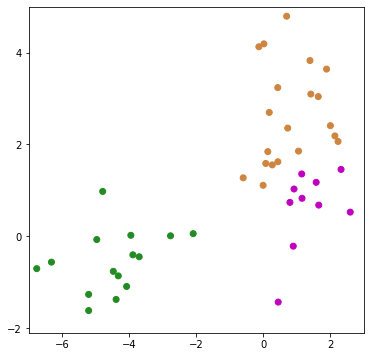

In [12]:
from scipy.cluster import hierarchy
np.random.seed(1988)
X = np.random.normal(0,1,(45,2))
X[:15] = X[:15] + [-5,0]
X[15:30] = X[15:30] + [1,3]
X[30:45] = X[30:45] + [1,1]
hc_complete = hierarchy.complete(X)
plt.figure(figsize=(6, 6))
color_list = ['forestgreen','peru','m']
cmap = ListedColormap(color_list)
plt.scatter(X[:,0],X[:,1],c = hierarchy.cut_tree(hc_complete,3).flatten() ,cmap=cmap)
plt.xlim([-7,3])
plt.ylim([-2.1,5])
plt.xticks([-6,-4,-2,0,2])
plt.yticks([-2,0,2,4])
plt.show()

**FIGURE 10.9**

In [13]:
def adjust_spines(ax,spines):
    for loc, spine in ax.spines.items():
        if loc in spines:
            spine.set_position(('outward', 10))  # outward by 10 points
        else:
            spine.set_color('none')  # don't draw spine

    # turn off ticks where there is no spine
    if 'left' in spines:
        ax.yaxis.set_ticks_position('left')
    else:
        # no yaxis ticks
        ax.yaxis.set_ticks([])

    if 'bottom' in spines:
        ax.xaxis.set_ticks_position('bottom')
    else:
        # no xaxis ticks
        ax.xaxis.set_ticks([])
    

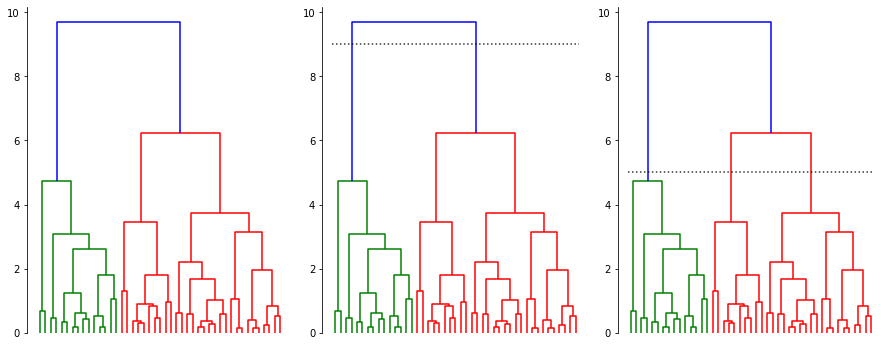

In [14]:
plt.figure(figsize=(15, 6))
plt.subplot(1,3,1)
hierarchy.dendrogram(hierarchy.complete(X))
frame = plt.gca()
adjust_spines(frame,['left'])
plt.subplot(1,3,2)
plt.axhline(9,color = 'k',alpha = 0.8,linestyle = ':')
hierarchy.dendrogram(hierarchy.complete(X))
frame = plt.gca()
adjust_spines(frame,['left'])
plt.subplot(1,3,3)
plt.axhline(5,color = 'k',alpha = 0.8,linestyle = ':')
hierarchy.dendrogram(hierarchy.complete(X))
frame = plt.gca()
adjust_spines(frame,['left'])
plt.show()